In [53]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt,*ko], index=genes)

In [60]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [61]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  690  714  726  741  718  384  365  395  402  348
gene2  430  384  447  429  446  647  676  683  653  633
gene3  559  542  543  569  546  285  311  290  298  273
gene4  115   93  110  130  115  356  365  383  367  382
gene5  192  218  219  234  223  446  450  444  446  418


In [62]:
print(data.shape)

(100, 10)


centering: the average value for each gene will be 0

scaling: the SD(standard deviation) for the values for each gene will be 1

In [63]:
scaled_data = preprocessing.scale(data.T)
# you could also use: 
# StandardScaler().fit_transform(data.T)

In [64]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

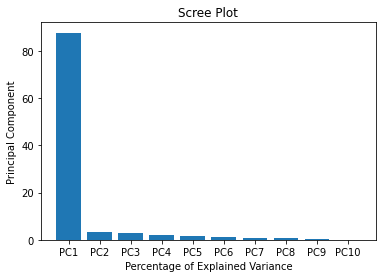

In [65]:
# scree plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.xlabel("Percentage of Explained Variance")
plt.ylabel("Principal Component")
plt.title("Scree Plot")
plt.show()

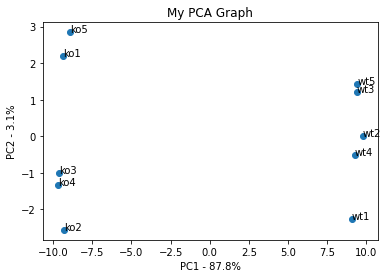

In [66]:
# pca plot
pca_df = pd.DataFrame(pca_data, index=[*wt,*ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

look at the loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [67]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_gene = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_gene])

# these values are super similar, so a lot of genes played a role in seperating the samples, rather than just one or two

gene27   -0.106639
gene59   -0.106619
gene64   -0.106608
gene79    0.106598
gene16   -0.106595
gene74   -0.106593
gene55   -0.106581
gene41   -0.106563
gene24    0.106543
gene11   -0.106533
dtype: float64
